<a href="https://colab.research.google.com/github/Jit562/Phone-Price-prdection/blob/main/Phone_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**
### **Phone Price Prediction Dataset**

*  This dataset contains detailed information about various smartphones, including their title, ratings, number of reviews, image URLs, and product URLs, along with the target column Price. The dataset can be used for price prediction tasks, leveraging both textual and visual data.

### **Dataset Columns:**

* **Title:** The name and model details of the phone.
* **Rating:** Average user rating for the phone.
* **Reviews:** The number of reviews left by customers.
* **Price (Target Column):** The price of the phone, which can be predicted using other features in the dataset.
* **Image URL:** A link to an image of the phone.
* **Product URL:** A link to the product page for more information.


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [56]:
df.head()

,Title,Rating,Reviews,Price,Image URL,Product URL
0,"Redmi Note 13 Pro+ (Fusion Black, 8GB RAM, 256...",3.8,684,"33,999",https://m.media-amazon.com/images/I/71nrf4zgq5...,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",3.8,60,"9,999",https://m.media-amazon.com/images/I/81T3olLXpU...,https://www.amazon.in/Samsung-Storage-Display-...
2,"realme NARZO N61 (Marble Black,6GB RAM+128GB S...",4.1,346,"10,999",https://m.media-amazon.com/images/I/71EN6N9kUE...,https://www.amazon.in/realme-Storage-Comfort-R...
3,"realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...",4.1,346,"10,999",https://m.media-amazon.com/images/I/71r0Ysx+oV...,https://www.amazon.in/realme-Storage-Comfort-R...
4,POCO C61 Ethereal Blue 4GB RAM 64GB ROM,3.5,27,"8,999",https://m.media-amazon.com/images/I/712tqhtIw1...,https://www.amazon.in/POCO-C61-Ethereal-Blue-6...


In [57]:
df.shape

(1582, 6)

In [58]:
df.isnull().sum()

,0
Title,0
Rating,0
Reviews,0
Price,0
Image URL,0
Product URL,0


In [59]:
df.drop(['Image URL','Product URL'],axis=1, inplace=True)

In [60]:
df.head()

,Title,Rating,Reviews,Price
0,"Redmi Note 13 Pro+ (Fusion Black, 8GB RAM, 256...",3.8,684,"33,999"
1,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",3.8,60,"9,999"
2,"realme NARZO N61 (Marble Black,6GB RAM+128GB S...",4.1,346,"10,999"
3,"realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...",4.1,346,"10,999"
4,POCO C61 Ethereal Blue 4GB RAM 64GB ROM,3.5,27,"8,999"


In [61]:
df.drop(['Rating','Reviews'],axis=1,inplace=True)

In [62]:
df.head()

,Title,Price
0,"Redmi Note 13 Pro+ (Fusion Black, 8GB RAM, 256...","33,999"
1,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...","9,999"
2,"realme NARZO N61 (Marble Black,6GB RAM+128GB S...","10,999"
3,"realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...","10,999"
4,POCO C61 Ethereal Blue 4GB RAM 64GB ROM,"8,999"


In [63]:
df.isnull().sum()

,0
Title,0
Price,0


In [64]:
df['Title'].duplicated().sum()

773

In [65]:
new_df = df.drop_duplicates()

In [66]:
new_df.shape

(809, 2)

In [67]:
new_df.head()

,Title,Price
0,"Redmi Note 13 Pro+ (Fusion Black, 8GB RAM, 256...","33,999"
1,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...","9,999"
2,"realme NARZO N61 (Marble Black,6GB RAM+128GB S...","10,999"
3,"realme NARZO N61 (Voyage Blue,6GB RAM+128GB St...","10,999"
4,POCO C61 Ethereal Blue 4GB RAM 64GB ROM,"8,999"


# **Custome function create model**

In [68]:
nums = "0123456789"
def process_numbers(x):
    line = ""

    for i in x:
        if i in nums:
            line += i
    return int(line) if len(line) > 0 else 0

In [69]:
new_df['Price'] = new_df['Price'].apply(process_numbers).astype(int)

In [70]:
new_df['Price']

,Price
0,33999
1,9999
2,10999
3,10999
4,8999
...,...
1577,39999
1578,15999
1579,26990
1580,42999


In [71]:
def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, label_type=location, rotation=rotation)
    axes.set_yticklabels(())
    axes.set_xlabel("")
    axes.set_ylabel("")

In [72]:
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
lnr = LinearRegression()
svr = SVR()
xgb = XGBRegressor()
lgb = LGBMRegressor()

models = [rfr, etr, abr, gbr,
         lnr, svr, xgb, lgb]

names = ["Random Forest", "Extra Trees", "Ada Boost", "Gradient Boosting",
        "Linear Regression", "Support Vector Machine", "XGBoost", "LightGBM"]

In [73]:
scaler = MinMaxScaler()
y = new_df.iloc[:, -1].values
y = scaler.fit_transform(y.reshape(-1, 1))


In [74]:
x = new_df.iloc[:, 0].values
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [76]:
def training():
    r2s, mses = [], []

    for i in models:
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        r2s += [r2_score(pred, y_test)*100]
        mses += [mean_squared_error(pred, y_test)]

    dd = pd.DataFrame({"r2": r2s, "mse": mses}, index=names)
    fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
    index = 0

    dd = dd.sort_values("r2", ascending=False)
    dd["r2"] = round(dd["r2"], 2)
    dd["r2"].plot(kind="bar", ax=axes[index])
    bar_labels(axes[index])
    axes[index].set_title("r2 scores")

    index += 1

    dd = dd.sort_values("mse", ascending=True)
    dd["mse"] = round(dd["mse"], 4)
    dd["mse"].plot(kind="bar", ax=axes[index])
    bar_labels(axes[index])
    axes[index].set_title("MSE scores")

    plt.tight_layout()
    plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2404
[LightGBM] [Info] Number of data points in the train set: 647, number of used features: 128
[LightGBM] [Info] Start training from score 0.005957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

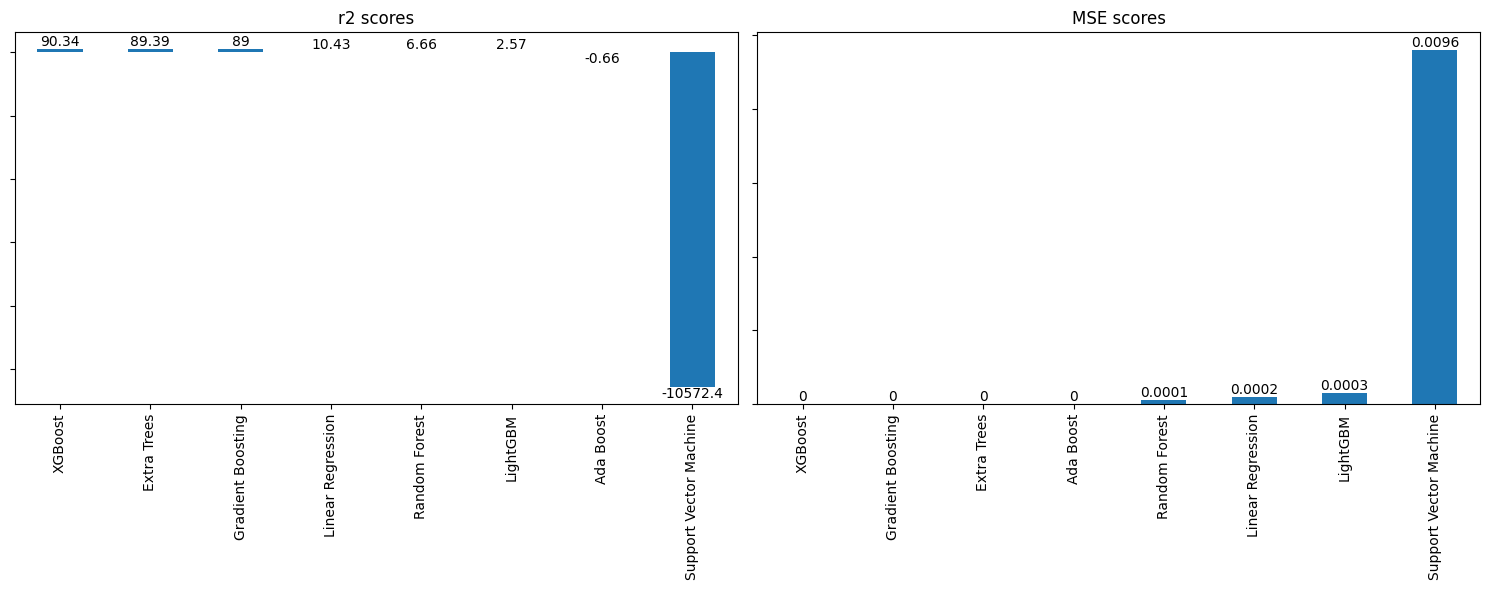

In [77]:
training()